In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import seaborn as sns
# suppress warning
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from shapely import wkt
from sklearn.neighbors import NearestNeighbors

#sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('Data/cleanedData/df.csv').set_index('id')
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='geometry')
features = list(df.iloc[:,:22].columns) + ['price']
gdf_selected = gdf[features]
gdf_selected.head()

,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,...,D5BR,NatWalkInd,logd3aao,logd3apo,d5dei_1,logd4d,UPTpercap,SLC_score,geometry,price
id,,,,,,,,,,,,,,,,,,,,,
2595.0,27.573915,5.263093,21.584268,0.726554,0.000000,29.490467,0.000000,0.000000,0.000000,0.000000,...,5178014,12.833333,1.834674,0.546128,1,9,226,96.239359,POINT (-73.98559 40.75356),240.0
6848.0,30.751272,0.000000,30.751272,0.000000,113.873138,0.000000,0.000000,113.873138,0.000000,0.000000,...,2251266,13.000000,0.000000,0.000000,0,9,226,94.581040,POINT (-73.95342 40.70935),81.0
6872.0,28.986195,0.000000,25.742601,3.243594,67.522049,0.000000,0.000000,67.522049,0.000000,0.000000,...,3601694,13.000000,0.000000,1.445410,1,8,226,93.362266,POINT (-73.94255 40.80107),65.0
6990.0,32.708200,0.414807,32.293392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3452424,10.666667,0.346993,0.000000,1,0,226,93.435522,POINT (-73.94759 40.78778),60.0
7097.0,45.569641,0.000000,11.570455,33.999187,398.418805,0.000000,62.884237,31.442119,393.026482,62.884237,...,2123353,14.500000,0.000000,3.555325,0,8,226,85.508628,POINT (-73.97389 40.69194),205.0


### Distribution

<Axes: >

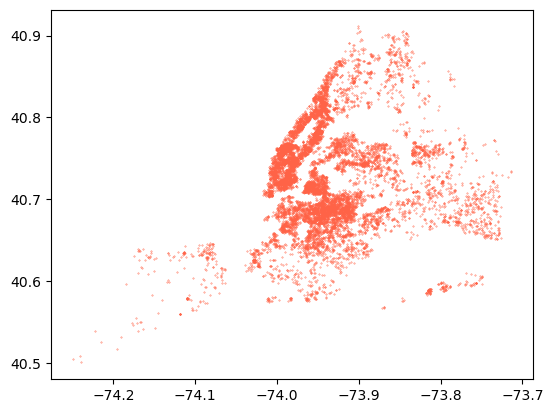

In [3]:
gdf_selected.plot(markersize = 0.1, color = 'tomato')

**Data distribution**: A data distribution graph shows the distribution of data points in geographic space. We can observe that the data points are mainly concentrated in specific areas and are densely distributed, but there are also some more isolated points distributed throughout the entire observation area.

### Significance of Clustering the Data
1. Understanding Market Segments:  
Price Differentiation: Clustering can help identify distinct segments where real estate prices are influenced by different transportation factors. For instance, one cluster may include high-priced areas with excellent pedestrian-oriented facilities, while another might feature lower-priced areas with limited access to transit.  
2. Spatial Analysis:  
Geographic Trends: By including geographic-based transportation metrics (like density of transit stops or intersection density), clustering can reveal spatial trends and dependencies. This might show how proximity to certain transportation facilities influences real estate prices across different regions.  
3. Transportation Influence:  
Impact Assessment: Clustering can assess the impact of various transportation features on property prices, such as the effect of nearness to transit stops (D4A) or the availability of multimodal intersections (D3BMM3, D3BMM4).
4. Policy and Planning:  
Urban Planning: Insights from this analysis could inform urban planning and development, helping to prioritize transportation improvements or new developments based on their potential impact on real estate values.  
Transportation Planning: Identifying correlations between transportation accessibility and property values can guide future transportation projects to maximize beneficial impacts on property prices.  

In [4]:
Keans_data = gdf_selected.drop(['geometry'],axis=1)

In [5]:
Keans_data

,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,...,D5AE,D5BR,NatWalkInd,logd3aao,logd3apo,d5dei_1,logd4d,UPTpercap,SLC_score,price
id,,,,,,,,,,,,,,,,,,,,,
2.595000e+03,27.573915,5.263093,21.584268,0.726554,0.000000,29.490467,0.000000,0.000000,0.000000,0.000000,...,559779,5178014,12.833333,1.834674,0.546128,1,9,226,96.239359,240.0
6.848000e+03,30.751272,0.000000,30.751272,0.000000,113.873138,0.000000,0.000000,113.873138,0.000000,0.000000,...,598987,2251266,13.000000,0.000000,0.000000,0,9,226,94.581040,81.0
6.872000e+03,28.986195,0.000000,25.742601,3.243594,67.522049,0.000000,0.000000,67.522049,0.000000,0.000000,...,588492,3601694,13.000000,0.000000,1.445410,1,8,226,93.362266,65.0
6.990000e+03,32.708200,0.414807,32.293392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,490680,3452424,10.666667,0.346993,0.000000,1,0,226,93.435522,60.0
7.097000e+03,45.569641,0.000000,11.570455,33.999187,398.418805,0.000000,62.884237,31.442119,393.026482,62.884237,...,495853,2123353,14.500000,0.000000,3.555325,0,8,226,85.508628,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.100000e+18,26.157956,6.325597,19.832359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,524459,3360905,10.000000,1.991375,0.000000,1,0,226,94.735003,89.0
1.100000e+18,38.250021,0.000000,15.044699,23.205322,174.844262,0.000000,104.885580,104.885580,0.000000,0.000000,...,497605,1447635,15.166667,0.000000,3.186573,0,8,226,90.076242,84.0
1.100000e+18,10.225101,9.209004,1.016097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,373338,3812516,11.166667,2.323270,0.000000,1,10,226,96.481810,55.0


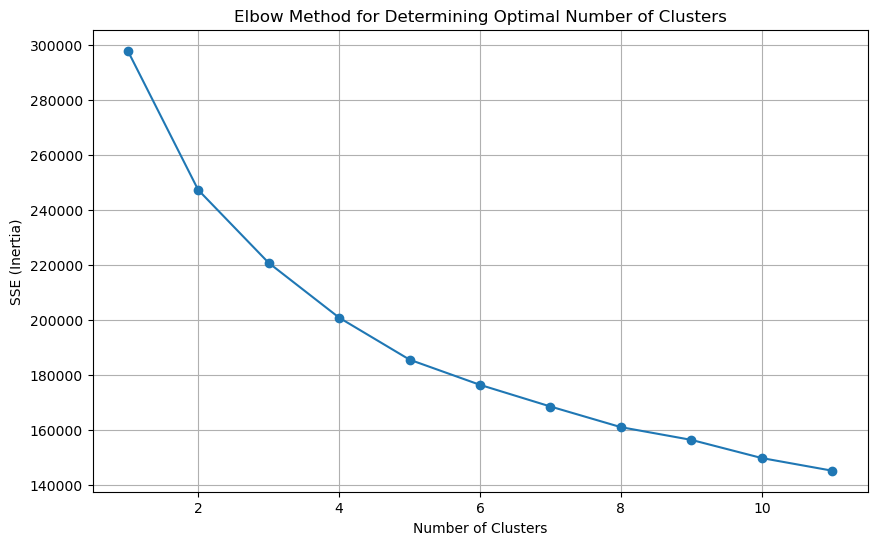

In [6]:
from sklearn.cluster import KMeans
# standard
scaler = StandardScaler()
Keans_data_std = pd.DataFrame(scaler.fit_transform(Keans_data),columns=Keans_data.columns)

# SSE
sse = []
for k in range(1, 12): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Keans_data_std)
    sse.append(kmeans.inertia_)

# plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

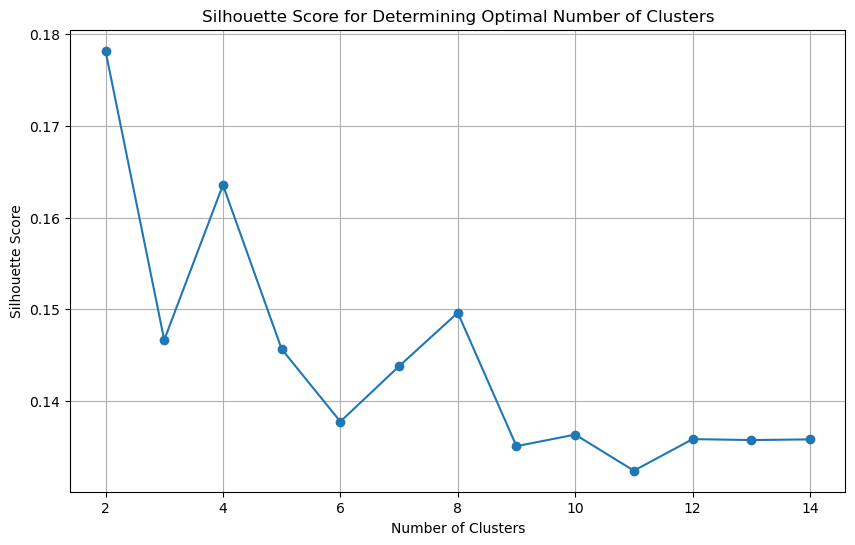

In [7]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 15): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(Keans_data_std)
    silhouette_scores.append(silhouette_score(Keans_data_std, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Score for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [8]:
# Fit K-means with the chosen number of clusters (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(Keans_data_std)
Keans_data['Cluster'] = clusters
Keans_data_std['Cluster'] = clusters
# Analyze cluster centers
print(kmeans.cluster_centers_)

[[ 0.26113388  0.64630274  0.43757451 -0.63975752 -0.56783113  0.50838345
  -0.28308399 -0.24875463 -0.30155088 -0.410073    0.98421832  0.79108578
  -0.35063043  1.14339923 -0.14531985  0.82209687 -0.71949729  1.23155091
   0.17266743  0.          0.82287047  0.3862706 ]
 [ 0.27136862 -0.13566743 -0.74629935  1.19064068  1.02233846 -0.11811666
   0.48992955  0.12495915  0.72670195  0.92059914 -0.4199746  -0.17217411
   0.35296443 -0.43159759  0.68842071 -0.17336494  0.98852274 -0.36972163
   0.02233046  0.         -0.62724575 -0.16734905]
 [-0.35505827 -0.32706437  0.22580461 -0.39814302 -0.32984394 -0.24947887
  -0.15094714  0.07617217 -0.30076022 -0.36278144 -0.3522506  -0.39615367
  -0.01347494 -0.44769664 -0.37607236 -0.41548178 -0.20822651 -0.54723703
  -0.12740901  0.         -0.10580746 -0.13652093]]


## Analysis

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [10]:
# Create a dictionary where each column name is a key, and all keys have the same list of aggregation functions
aggregate_functions = {col: ['mean', 'median', 'min', 'max', 'std'] for col in Keans_data.columns if col != 'Cluster'}

# Use groupby and agg to calculate aggregated statistics for each cluster
cluster_summary = Keans_data.groupby('Cluster').agg(aggregate_functions)

# Flatten the columns (since they'll be multi-level after aggregation)
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

# Display the cluster summary table
display(cluster_summary.T)

Cluster,0,1,2
D3A_mean,3.358879e+01,3.369073e+01,2.757494e+01
D3A_median,3.198234e+01,3.254033e+01,2.742155e+01
D3A_min,1.228937e+00,9.304251e+00,0.000000e+00
D3A_max,1.261524e+02,1.073409e+02,5.678700e+01
D3A_std,1.242883e+01,8.633465e+00,7.070624e+00
D3AAO_mean,6.626792e+00,1.691671e+00,4.836062e-01
D3AAO_median,4.002494e+00,0.000000e+00,0.000000e+00
D3AAO_min,0.000000e+00,0.000000e+00,0.000000e+00
D3AAO_max,1.079877e+02,4.227906e+01,2.318389e+01
D3AAO_std,9.699691e+00,4.399987e+00,1.755600e+00


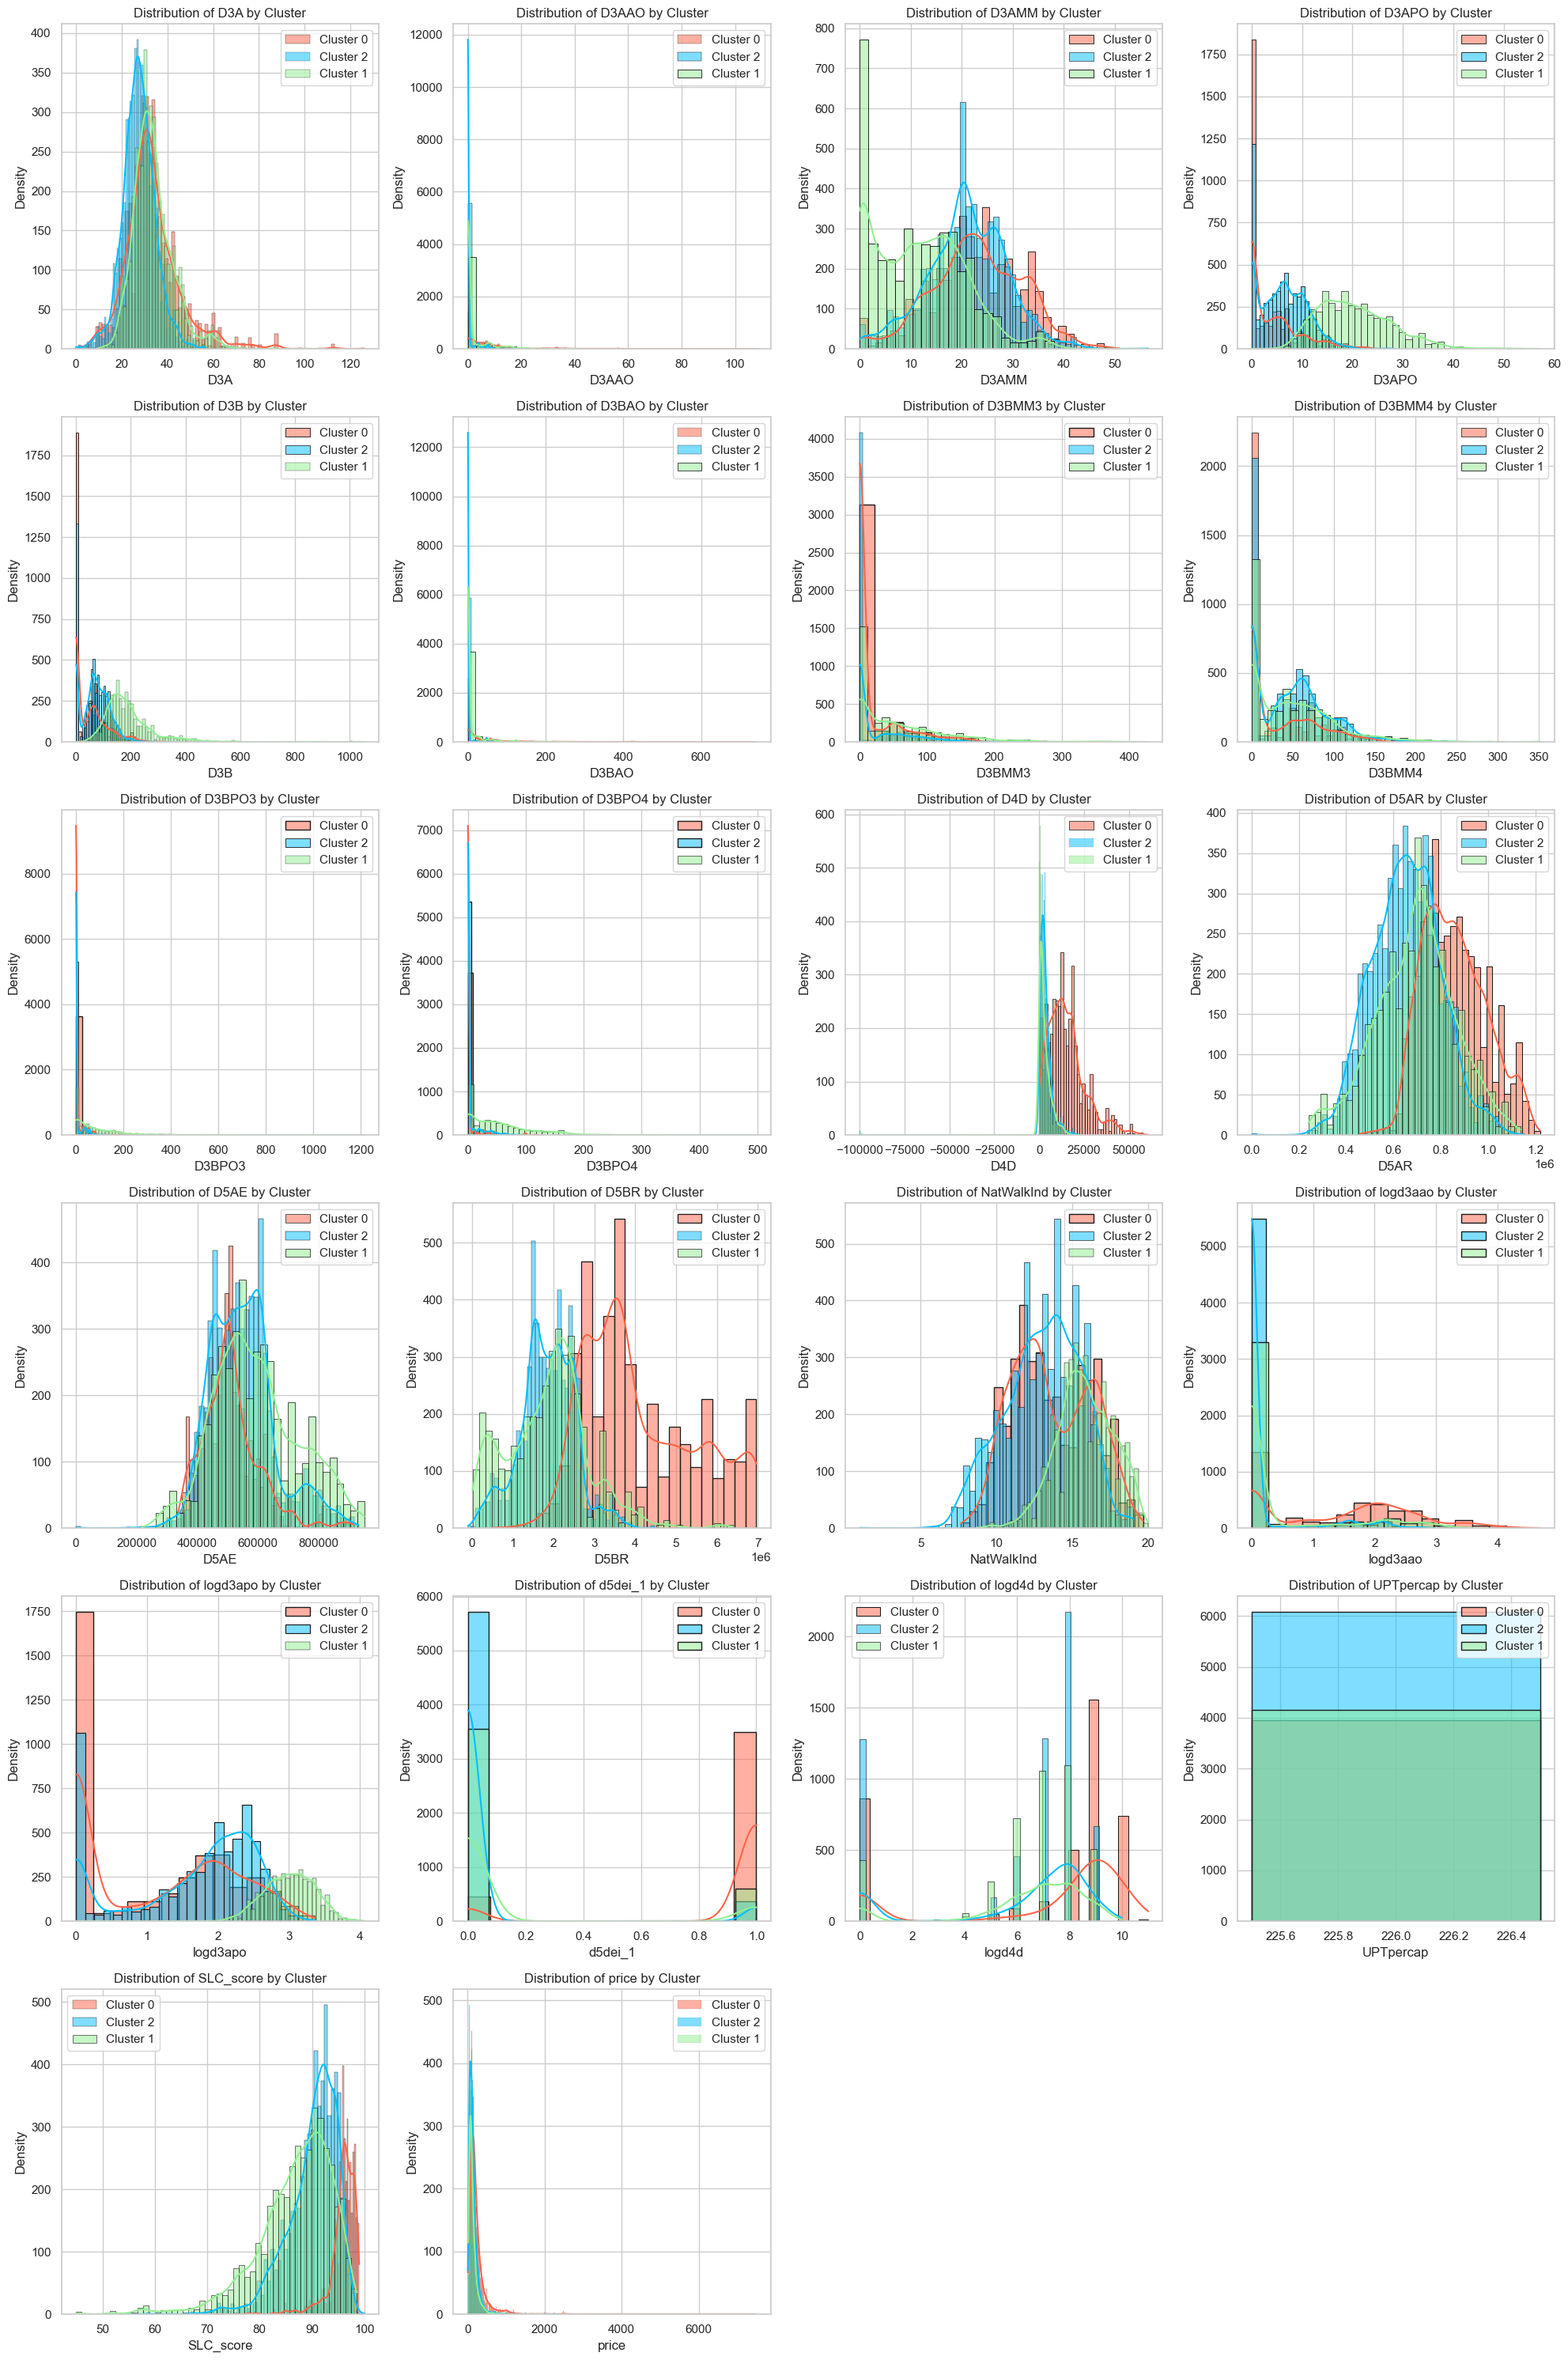

In [16]:
data = Keans_data  # DataFrame 
clusters = data['Cluster'].unique()  # get labels

colors = {0: 'tomato', 1: 'lightgreen', 2: 'deepskyblue'}
# plot
sns.set(style="whitegrid")

num_columns = data.drop(['Cluster'], axis=1).shape[1]  # get col num
num_rows = (num_columns + 3) // 4  
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # create subfig

for idx, column in enumerate(data.columns.drop('Cluster')):
    row_idx = idx // 4  
    col_idx = idx % 4 
    ax = axes[row_idx, col_idx]
    for cluster in clusters:
        subset = data[data['Cluster'] == cluster][column] 
        sns.histplot(subset, kde=True, color=colors[cluster], ax=ax, alpha=0.5, edgecolor='k',
                     label=f'Cluster {cluster}')
    ax.set_title(f'Distribution of {column} by Cluster')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.legend()

if num_rows > 1:
    for idx in range(num_columns % 4, 4):
        fig.delaxes(axes[num_rows - 1, idx])

plt.tight_layout()
plt.show()


In [25]:
bird_palette = {0: 'tomato', 1: 'lightgreen', 2: 'deepskyblue'}
cmap = matplotlib.colors.ListedColormap([bird_palette[b] for b in Keans_data_std.Cluster.unique()])

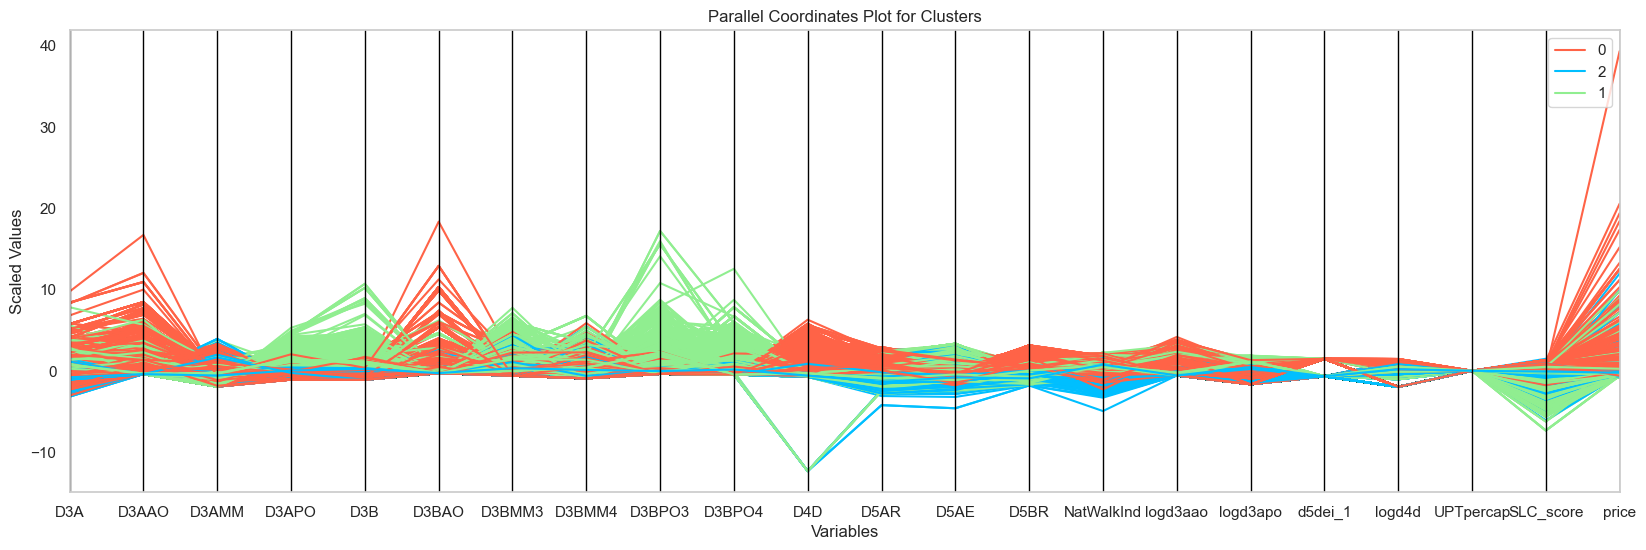

In [28]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20, 6))
parallel_coordinates(Keans_data_std, 'Cluster', colormap=cmap)
plt.title('Parallel Coordinates Plot for Clusters')
plt.xlabel('Variables')
plt.ylabel('Scaled Values')
plt.show()

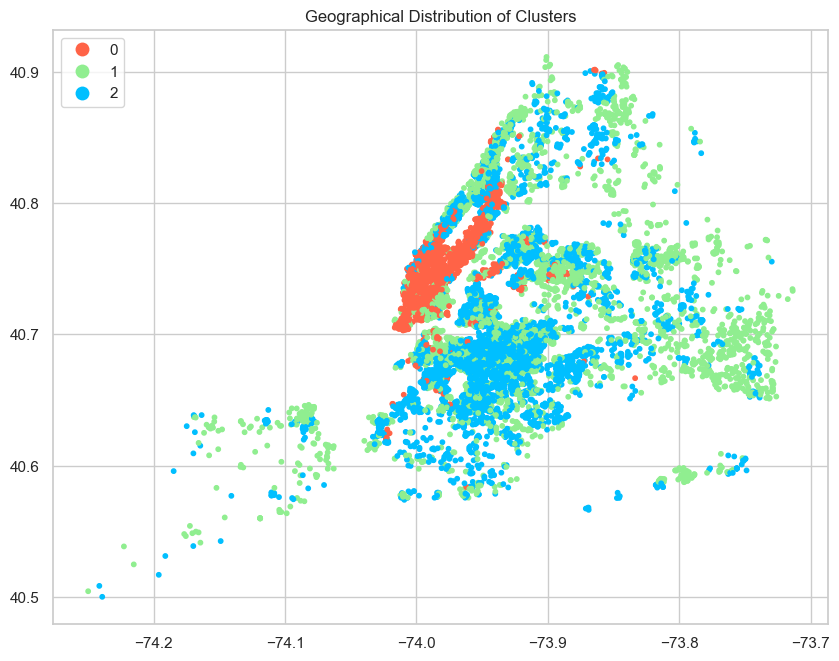

In [32]:
# Plotting the geographical distribution of clusters
gdf_kmean=gpd.GeoDataFrame(Keans_data,geometry=gpd.points_from_xy(gdf_selected['geometry'].x,gdf_selected['geometry'].y))
cmap = matplotlib.colors.ListedColormap(['tomato','lightgreen', 'deepskyblue'])
fig, ax = plt.subplots(figsize=(10, 10))
gdf_kmean.plot(column='Cluster', ax=ax, legend=True, markersize=10, cmap=cmap, categorical=True, legend_kwds={'loc': 'upper left'})
plt.title('Geographical Distribution of Clusters')
plt.show()

Analysis Summary:
- Cluster 0 likely represents commercial centers or highly developed areas with high housing prices and automated traffic facilities.
- Cluster 1 is likely a more tranquil residential area, pedestrian-friendly, suitable for living but with lower housing prices.
- Cluster 2 could be an area with high overall quality of life, suitable for residents seeking high-quality living conditions.